In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("Data Science Job posts.csv")

In [3]:
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea..."
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn..."
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac..."
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']"
4,data scientist,NaN,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[]


In [4]:
df.dtypes

job_title          object
seniority_level    object
status             object
company            object
location           object
post_date          object
headquarter        object
industry           object
ownership          object
company_size       object
revenue            object
salary             object
skills             object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   job_title        941 non-null    object
 1   seniority_level  884 non-null    object
 2   status           688 non-null    object
 3   company          944 non-null    object
 4   location         942 non-null    object
 5   post_date        944 non-null    object
 6   headquarter      944 non-null    object
 7   industry         944 non-null    object
 8   ownership        897 non-null    object
 9   company_size     944 non-null    object
 10  revenue          929 non-null    object
 11  salary           944 non-null    object
 12  skills           944 non-null    object
dtypes: object(13)
memory usage: 96.0+ KB


In [6]:
# Check for missing values
df.isnull().sum()

job_title            3
seniority_level     60
status             256
company              0
location             2
post_date            0
headquarter          0
industry             0
ownership           47
company_size         0
revenue             15
salary               0
skills               0
dtype: int64

In [7]:
# check for duplicates
df.duplicated().sum()

0

In [8]:
#Get the dimensions of df
df.shape

(944, 13)

In [9]:
#Compute statistics
df.describe()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
count,941,884,688,944,942,944,944,944,897,944,929,944,944
unique,4,4,3,420,431,42,197,8,2,510,312,896,400
top,data scientist,senior,on-site,company_134,"Bengaluru, Karnataka, India",a month ago,"San Francisco, CA, US",Technology,Public,900,Private,"€114,169",[]
freq,856,630,363,30,52,167,91,582,579,18,247,3,201


In [10]:
df['location']

0                                 Grapevine, TX . Hybrid
1                                Fort Worth, TX . Hybrid
2      Austin, TX . Toronto, Ontario, Canada . Kirkla...
3      Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...
4                                                On-site
                             ...                        
939                          Bengaluru, Karnataka, India
940                       Melbourne, Victoria, Australia
941                                           McLean, VA
942                                         New York, NY
943                                        San Diego, CA
Name: location, Length: 944, dtype: object

In [11]:
df[df["job_title"].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
34,NaN,midlevel,NaN,company_064,"Barcelona, Catalonia, Spain",7 days ago,"Barcelona, CT, ES",Technology,NaN,900,Nonprofit,"€28,068","['git', 'r', 'python', 'linux', 'bash']"
247,NaN,midlevel,NaN,company_470,"Austin, TX",4 months ago,"Austin, TX, US",Education,NaN,"16,011",Education,"€68,505","['linux', 'python']"
509,NaN,lead,hybrid,company_946,"New York, NY . Hybrid",5 days ago,"New York, NY, US",Technology,Private,"52,380",Private,"€200,935 - €296,834","['aws', 'gcp', 'azure']"


In [12]:
#Fill the job title column
df['job_title'].fillna('Uknown', inplace=True)

In [13]:
# Check if the missing values have been filled
df[df['job_title'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [14]:
#Fill the nulls in seniority level 
df['seniority_level'].fillna('Uknown', inplace=True)

In [15]:
# Check if the nulls have been filled
df[df['seniority_level'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [16]:
df[df["status"].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
5,data scientist,lead,NaN,company_013,"New York, NY",3 months ago,"New York, NY, US",Technology,Private,150,€2.16B,"€196,371 - €251,170","['scikit-learn', 'python', 'scala', 'sql', 'ma..."
6,data scientist,junior,NaN,company_014,"Berkeley, CA",15 days ago,"Berkeley, CA, US",Education,NaN,"17,471",Education,"€51,330 - €70,144",[]
10,data scientist,senior,NaN,company_022,"Atlanta, GA",15 days ago,"Charlotte, NC, US",Technology,Public,"103,010",€128.13B,"€96,815","['pytorch', 'r', 'python', 'sql', 'machine lea..."
11,data scientist,midlevel,NaN,company_027,Greater Vancouver Metropolitan Area,6 days ago,"Vancouver, BC, CA",Education,NaN,240,Education,"€62,697 - €89,293","['java', 'git', 'python']"
16,data scientist,lead,NaN,company_038,"Bengaluru, Karnataka, India",6 days ago,"Kista, SE",Technology,Public,"132,000",€17.41B,"€52,746","['spark', 'aws', 'r', 'python', 'machine learn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,machine learning engineer,midlevel,NaN,company_941,"Bengaluru, Karnataka, India . Bangalore, Karna...",21 days ago,"Dublin, IE",Technology,Public,"492,245",€154.21B,"€10,601 - €26,376",['machine learning']
934,data scientist,midlevel,NaN,company_881,"Singapore, Singapore",a month ago,CN,Technology,Private,"110,010",€129.04B,"€57,958 - €103,129","['sql', 'machine learning', 'r', 'python']"
936,data scientist,senior,NaN,company_844,"Mountain View, CA",8 days ago,"Mountain View, CA, US",Technology,Public,"17,050",€95.37B,"€170,195","['spark', 'r', 'python', 'sql', 'tableau']"
939,data scientist,senior,NaN,company_171,"Bengaluru, Karnataka, India",a day ago,"Armonk, NY, US",Technology,Public,"524,598",€120.29B,"€33,288 - €53,080","['pytorch', 'python', 'sql', 'machine learning..."


In [17]:
df['status'].fillna("uknown", inplace=True)

In [18]:
df[df['status'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [19]:
df[df['location'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
174,machine learning engineer,senior,uknown,company_326,NaN,2 years ago,"Mumbai, MH, IN",Technology,Private,910,€7.41B,"€44,207",[]
201,machine learning engineer,lead,uknown,company_326,NaN,a year ago,"Mumbai, MH, IN",Technology,Private,910,€7.66B,"€44,202",[]


In [20]:
df['location'].fillna('uknown', inplace=True)

In [21]:
df[df['location'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [22]:
#Select single column
df['ownership'].head(10)

0     Public
1     Public
2     Public
3     Public
4    Private
5    Private
6        NaN
7     Public
8    Private
9     Public
Name: ownership, dtype: object

In [23]:
df[df['ownership'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
6,data scientist,junior,uknown,company_014,"Berkeley, CA",15 days ago,"Berkeley, CA, US",Education,NaN,"17,471",Education,"€51,330 - €70,144",[]
11,data scientist,midlevel,uknown,company_027,Greater Vancouver Metropolitan Area,6 days ago,"Vancouver, BC, CA",Education,NaN,240,Education,"€62,697 - €89,293","['java', 'git', 'python']"
28,data scientist,senior,on-site,company_051,"Laurel, MD",a month ago,"Laurel, MD, US",Technology,NaN,"8,010",Education,"€210,071",['python']
34,Uknown,midlevel,uknown,company_064,"Barcelona, Catalonia, Spain",7 days ago,"Barcelona, CT, ES",Technology,NaN,900,Nonprofit,"€28,068","['git', 'r', 'python', 'linux', 'bash']"
56,data scientist,midlevel,uknown,company_101,"Cambridge, England, United Kingdom",8 days ago,"Cambridge, GB",Education,NaN,"10,933",Education,"€31,175",[]
65,data scientist,midlevel,uknown,company_014,"Berkeley, CA",15 days ago,"Berkeley, CA, US",Education,NaN,"17,451",Education,"€82,193 - €122,141","['machine learning', 'database']"
116,data scientist,senior,on-site,company_226,"Rochester, New York Metropolitan Area",22 days ago,"Rochester, NY, US",Education,NaN,"9,320",Education,"€55,196 - €77,273","['deep learning', 'machine learning']"
223,data scientist,senior,remote,company_418,"Washington, United States . Idaho, United Stat...",7 days ago,"Seattle, WA, US",Finance,NaN,"2,810",Nonprofit,"€88,967 - €166,051","['tableau', 'sql', 'r', 'python']"
224,data scientist,midlevel,remote,company_421,Mexico City Metropolitan Area . Fully Remote,15 days ago,"Cheyenne, WY, US",Technology,NaN,Private,NaN,"€25,212","['sql', 'machine learning', 'python']"
237,data scientist,midlevel,remote,company_421,"São Paulo, São Paulo, Brazil . Fully Remote",14 days ago,"Cheyenne, WY, US",Technology,NaN,Private,NaN,"€25,214","['sql', 'machine learning', 'python']"


In [24]:
df['ownership'].fillna('uknown', inplace=True)

In [25]:
df[df['ownership'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [26]:
df[df['revenue'].isnull()].head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills
224,data scientist,midlevel,remote,company_421,Mexico City Metropolitan Area . Fully Remote,15 days ago,"Cheyenne, WY, US",Technology,uknown,Private,NaN,"€25,212","['sql', 'machine learning', 'python']"
237,data scientist,midlevel,remote,company_421,"São Paulo, São Paulo, Brazil . Fully Remote",14 days ago,"Cheyenne, WY, US",Technology,uknown,Private,NaN,"€25,214","['sql', 'machine learning', 'python']"
251,machine learning engineer,senior,uknown,company_142,"New York, NY . Boston, MA . Los Angeles, CA",a year ago,"Cambridge, MA, US",Technology,uknown,Private,NaN,"€146,141 - €255,740","['pytorch', 'machine learning']"
493,data scientist,senior,on-site,company_893,"Lexington, MA",8 days ago,"Heerlen, LI, NL",Technology,uknown,Private,NaN,"€117,553 - €159,840","['aws', 'git', 'r', 'python', 'docker']"
495,data scientist,midlevel,remote,company_421,"Charlotte, AR . Fully Remote",14 days ago,"Cheyenne, WY, US",Technology,uknown,Private,NaN,"€25,211","['sql', 'machine learning', 'python']"


In [27]:
df['revenue'].fillna('0', inplace=True)

In [28]:
df[df['revenue'].isnull()]

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills


In [29]:
#Check if the missing values have been filled
df.isnull().sum()

job_title          0
seniority_level    0
status             0
company            0
location           0
post_date          0
headquarter        0
industry           0
ownership          0
company_size       0
revenue            0
salary             0
skills             0
dtype: int64

In [30]:
#Check the role of each by their role
role_salary = df.groupby('job_title')['salary'].agg(['mean','median','count'])
role_salary

TypeError: agg function failed [how->mean,dtype->object]

In [33]:
df.dtypes

job_title          object
seniority_level    object
status             object
company            object
location           object
post_date          object
headquarter        object
industry           object
ownership          object
company_size       object
revenue            object
salary             object
skills             object
dtype: object

In [36]:
df['salary_clean'] = (
    df['salary'].str.replace(r'[^\d.]', '', regex=True)
                 .astype(float)
)

In [37]:
df.head(2)

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills,salary_clean
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea...",1.004722e+11
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn...",1.187330e+05


In [39]:
df['salary_clean']

0      1.004722e+11
1      1.187330e+05
2      9.498716e+10
3      1.127972e+11
4      1.141722e+11
           ...     
939    3.328853e+09
940    6.429000e+04
941    1.459042e+11
942    1.591492e+11
943    1.954862e+11
Name: salary_clean, Length: 944, dtype: float64

In [42]:
# Check unique problematic values first
print(df['revenue'].unique()[:20])   # show first 20 unique entries


['Public' '€51.10B' '€33.80B' '€81.71B' 'Private' '€2.16B' 'Education'
 '€61.06B' '€128.13B' '€43.18B' '€413.02B' '€17.41B' '€163.38B' '€1.29B'
 '€247.18B' '€51.40B' '€913.33M' '€24.36B' '€1.49B' '€3.45B']


In [43]:
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills,salary_clean
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea...",1.004722e+11
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn...",1.187330e+05
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac...",9.498716e+10
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']",1.127972e+11
4,data scientist,Uknown,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[],1.141722e+11


In [45]:
# Create another revenue column
df['revenue_clean'] = (
    df['revenue']
    .astype(str)
    .str.replace(r'[^\d.]', '', regex=True)   # keep only digits + dot
    .replace('', 0)                           # empty strings -> 0
)

In [46]:
#Convert the column from an object to a numeric column and fill the unique values with a 0
df['revenue_clean'] = pd.to_numeric(df['revenue_clean'], errors='coerce').fillna(0)

In [47]:
df['revenue_clean']

0        0.00
1       51.10
2       33.80
3       81.71
4        0.00
        ...  
939    120.29
940    838.78
941     36.29
942     36.34
943     95.22
Name: revenue_clean, Length: 944, dtype: float64

In [48]:
#Check whether the two new columns have been created
df.head(2)

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills,salary_clean,revenue_clean
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea...",1.004722e+11,0.0
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn...",1.187330e+05,51.1


In [51]:
#Check the salary of each by their role
role_salary = df.groupby('job_title')['salary_clean'].agg(['mean','median','count'])
role_salary

,mean,median,count
job_title,,,
Uknown,6.697846e+10,6.850500e+04,3
data analyst,6.904700e+04,6.904700e+04,1
data engineer,1.105160e+11,1.137147e+11,4
data scientist,7.067193e+10,8.080414e+10,856
machine learning engineer,7.038497e+10,1.060526e+09,80


In [55]:
# Check the revenue of each by their role
role_revenue = df.groupby('job_title')['revenue_clean'].agg(['mean','median','count'])
role_revenue

,mean,median,count
job_title,,,
Uknown,0.000000,0.000,3
data analyst,0.000000,0.000,1
data engineer,835.907500,835.870,4
data scientist,64.776565,0.000,856
machine learning engineer,93.941750,33.835,80


In [57]:
# check the salary of each by seniority level
level_salary = df.groupby('seniority_level')['salary_clean'].agg(['mean','median','count'])
level_salary

,mean,median,count
seniority_level,,,
Uknown,8.716760e+10,1.096046e+11,60
junior,4.280683e+10,1.052426e+09,25
lead,7.199915e+10,2.585915e+05,116
midlevel,6.244239e+10,7.087816e+10,113
senior,7.152516e+10,8.586065e+10,630


In [58]:
# check the revenue of each by seniority level
level_revenue = df.groupby('seniority_level')['revenue_clean'].agg(['mean','median','count'])
level_revenue

,mean,median,count
seniority_level,,,
Uknown,33.283000,0.0,60
junior,56.626000,19.7,25
lead,72.340603,0.0,116
midlevel,86.190619,0.0,113
senior,71.054016,0.0,630


In [63]:
role_skills = df.groupby('job_title')['skills'].apply(list)
role_skills

job_title
Uknown                       [['git', 'r', 'python', 'linux', 'bash'], ['li...
data analyst                                                      [['python']]
data engineer                [['amazon', 'spark', 'python', 'scala', 'sql',...
data scientist               [['spark', 'r', 'python', 'scala', 'machine le...
machine learning engineer    [['machine learning'], ['pytorch', 'python', '...
Name: skills, dtype: object

In [72]:
# Check the revenue each company generates
company_revenue = df.groupby('company')['revenue_clean'].agg(['mean','median'])
company_revenue.sort_values(by='mean', ascending=False).head()

,mean,median
company,,
company_094,913.33,913.33
company_209,913.33,913.33
company_255,913.33,913.33
company_137,913.33,913.33
company_046,913.33,913.33


In [74]:
df['company_size'].head()

0    €352.44B
1     155,030
2      25,930
3      34,690
4       1,800
Name: company_size, dtype: object

In [75]:
df.head()

,job_title,seniority_level,status,company,location,post_date,headquarter,industry,ownership,company_size,revenue,salary,skills,salary_clean,revenue_clean
0,data scientist,senior,hybrid,company_003,"Grapevine, TX . Hybrid",17 days ago,"Bentonville, AR, US",Retail,Public,€352.44B,Public,"€100,472 - €200,938","['spark', 'r', 'python', 'scala', 'machine lea...",1.004722e+11,0.00
1,data scientist,lead,hybrid,company_005,"Fort Worth, TX . Hybrid",15 days ago,"Detroit, MI, US",Manufacturing,Public,"155,030",€51.10B,"€118,733","['spark', 'r', 'python', 'sql', 'machine learn...",1.187330e+05,51.10
2,data scientist,senior,on-site,company_007,"Austin, TX . Toronto, Ontario, Canada . Kirkla...",a month ago,"Redwood City, CA, US",Technology,Public,"25,930",€33.80B,"€94,987 - €159,559","['aws', 'git', 'python', 'docker', 'sql', 'mac...",9.498716e+10,33.80
3,data scientist,senior,hybrid,company_008,"Chicago, IL . Scottsdale, AZ . Austin, TX . Hy...",8 days ago,"San Jose, CA, US",Technology,Public,"34,690",€81.71B,"€112,797 - €194,402","['sql', 'r', 'python']",1.127972e+11,81.71
4,data scientist,Uknown,on-site,company_009,On-site,3 days ago,"Stamford, CT, US",Finance,Private,"1,800",Private,"€114,172 - €228,337",[],1.141722e+11,0.00


In [77]:
#Clean the company_size column
df['company_size_clean'] = (
    df['company_size']
    .astype(str)                                # make sure all values are strings
    .str.replace(r'[^\d.]', '', regex=True)     # keep only digits + dot
    .str.replace(r'\.', '', regex=True, n=1)    # handle commas/extra dots
)
df['company_size_clean']

0       35244
1      155030
2       25930
3       34690
4        1800
        ...  
939    524598
940    865456
941     55150
942     55110
943     17040
Name: company_size_clean, Length: 944, dtype: object

In [78]:
# Convert it from object data type to numeric
df['company_size_clean'] = pd.to_numeric(df['company_size_clean'], errors='coerce')

In [80]:
df['company_size_clean'].dtypes

dtype('float64')

In [84]:
# Get the top ten companies according to their sizes
Assetbase = df.groupby('company')['company_size_clean'].agg(['mean','median','count'])
Assetbase.sort_values(by='mean', ascending=False).head(10)

,mean,median,count
company,,,
company_134,865446.333333,865446.0,30
company_171,524596.750000,524603.0,8
company_937,500010.000000,500010.0,2
company_941,492225.000000,492225.0,21
company_980,409051.250000,409050.0,8
company_985,312036.666667,312040.0,3
company_025,309170.000000,309170.0,1
company_270,300041.428571,300050.0,7
company_244,290773.500000,290770.0,20


In [95]:
# Group each title with the industry they are in.
Title_industry = df.groupby('job_title')['industry'].value_counts(normalize=True).unstack()
Title_industry

industry,Education,Energy,Finance,Healthcare,Logistics,Manufacturing,Retail,Technology
job_title,,,,,,,,
Uknown,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,0.666667
data analyst,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
data engineer,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
data scientist,0.021028,0.011682,0.143692,0.089953,0.001168,0.008178,0.117991,0.606308
machine learning engineer,NaN,0.025000,0.050000,0.062500,0.037500,NaN,0.062500,0.762500


In [94]:
#group the job title with the status
title_status = df.groupby('job_title')['status'].value_counts(normalize=True).unstack()
title_status

status,hybrid,on-site,remote,uknown
job_title,,,,
Uknown,0.333333,NaN,NaN,0.666667
data analyst,NaN,NaN,NaN,1.000000
data engineer,NaN,0.750000,NaN,0.250000
data scientist,0.226636,0.383178,0.134346,0.255841
machine learning engineer,0.150000,0.400000,0.037500,0.412500


In [99]:
# Job titles that are most in demand
df['job_title'].value_counts().head()

job_title
data scientist               856
machine learning engineer     80
data engineer                  4
Uknown                         3
data analyst                   1
Name: count, dtype: int64

In [100]:
#What is the distribution of seniority levels?
df['seniority_level'].value_counts(normalize=True) * 100

seniority_level
senior      66.737288
lead        12.288136
midlevel    11.970339
Uknown       6.355932
junior       2.648305
Name: proportion, dtype: float64

In [103]:
#Corelation between revenue and salary
df[['salary_clean','revenue_clean']].corr()

,salary_clean,revenue_clean
salary_clean,1.000000,0.019667
revenue_clean,0.019667,1.000000


In [104]:
#industries with highest salaries
df.groupby('industry')['salary_clean'].mean().sort_values(ascending=False)

industry
Energy           1.082724e+11
Retail           1.019051e+11
Healthcare       7.080786e+10
Technology       6.659187e+10
Finance          6.636510e+10
Logistics        4.566834e+10
Manufacturing    3.956265e+10
Education        3.887621e+10
Name: salary_clean, dtype: float64

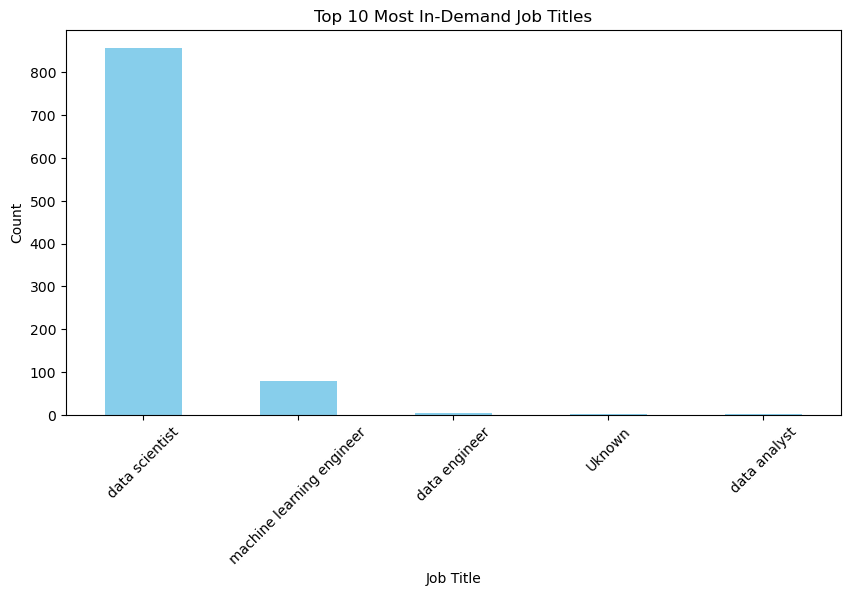

In [105]:
# Job titles most in demand
plt.figure(figsize=(10,5))
df['job_title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most In-Demand Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

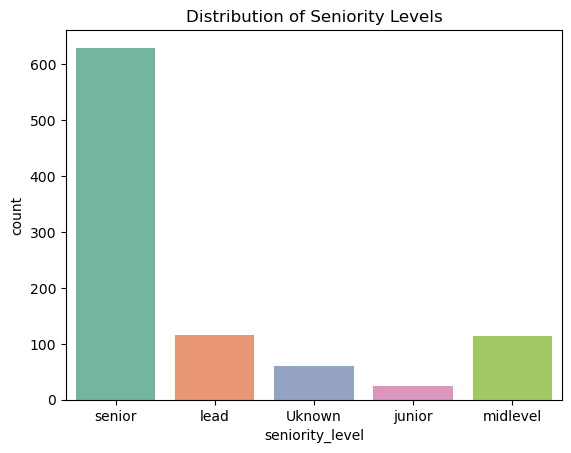

In [109]:
#Distribution of seniority levels
sns.countplot(x='seniority_level', data=df, palette='Set2')
plt.title("Distribution of Seniority Levels")
plt.show()

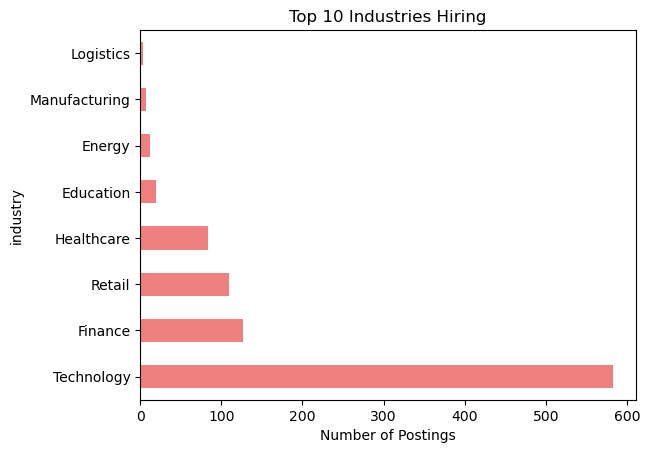

In [110]:
#Industries hiring the most
df['industry'].value_counts().head(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Industries Hiring")
plt.xlabel("Number of Postings")
plt.show()

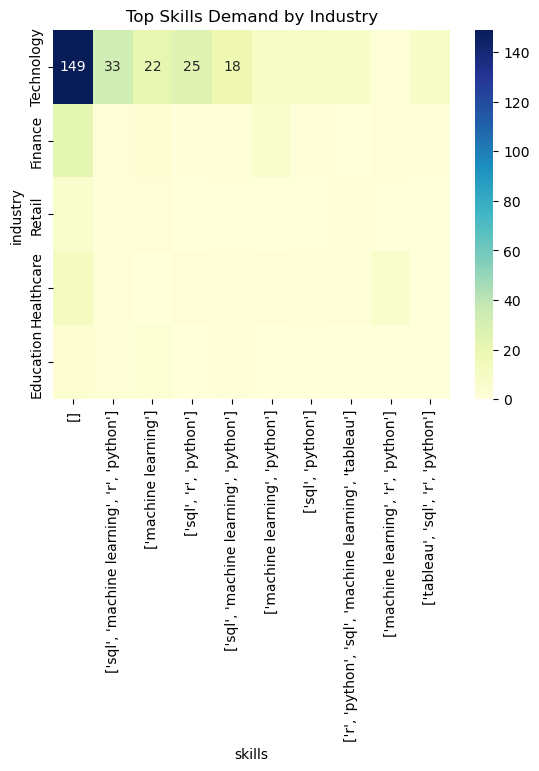

In [111]:
# Skills by industry (heatmap style: top 5 industries vs top 10 skills)
skills_industry = df.explode('skills').groupby(['industry','skills']).size().unstack(fill_value=0)
top_industries = df['industry'].value_counts().head(5).index
top_skills = df['skills'].explode().value_counts().head(10).index
sns.heatmap(skills_industry.loc[top_industries, top_skills], cmap="YlGnBu", annot=True, fmt="d")
plt.title("Top Skills Demand by Industry")
plt.show()